In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
#from kmeans_eval import visualize_silhouette
from sklearn.datasets import make_blobs
from matplotlib import cm


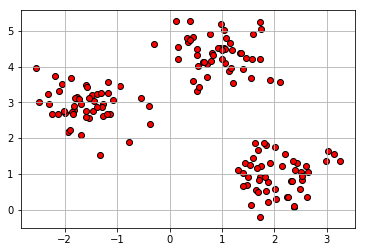

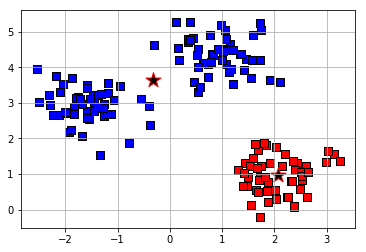

In [5]:
# 비지도 학습 - 군집
# 군집의 유형
# 프로토타입(센터노이드) 기반 군집
# 계층적 군집, 밀집도 기반 군집

# prototype based 군집의 특성
# 각 군집이 처음부터 완성되어 있는 것이 아니고 
# 군집화 시도 횟수에 따라 군집의 유형이 변함

# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False)


# 더미 데이터 생성
X, y = make_blobs(n_samples=150, n_features=2, 
                  centers=3, cluster_std=0.5, 
                  shuffle=True,random_state=0)
# n_samples=표본데이터 수, n_features=독립변수 수, centers=생성할 군집수,
# cluster_std=클러스터 표준편차, shuffle=섞을것인지 유무


# print(X)


# 시각화
plt.scatter(X[:,0], X[:,1], c='r', marker='o', edgecolors='k')
plt.grid(True)
plt.show()

# kmeans 군집분석
kms2 = KMeans(n_clusters=2, max_iter=300, random_state=0)
# n_clusters : 군집 개수  /  max_iter : 군집화 시도 횟수
# n_init : 각각의 10개의 센터노이드를 선정 후 군집화하고  
#          가장 최적의 SSE를 선택해서 최종 모델로 선정
#          표본수, 독립변수에 비례해서 값 설정
# n_jobs : 군집화 사용할 CPU 코어 지정(병렬처리)
#          -1 로 설정시 CPU 의 모든 코어 사용


pred = kms2.fit_predict(X)

kms2.labels_
kms2.cluster_centers_
kms2.inertia_

# kmeans 분석 평가
# 군집된 결과 => kms.labels_에 저장
confusion_matrix(y, kms2.labels_)

# 실루엣 계수 : 군집 적합도를 수치로 나타낸 것 / 1에 가까울수록 군집이 잘된 것으로 파악
silhouette_score(X, pred)
silhouette_score(X, kms2.labels_)

# kmeans 군집 시각화
# 군집 1 표시 : kms.labels_==0
plt.scatter(X[kms2.labels_==0,0], X[kms2.labels_==0,1],
            s=50, c='red', marker='s', edgecolors='k')

# 군집 2 표시 : kms.labels_==1
plt.scatter(X[kms2.labels_==1,0], X[kms2.labels_==1,1],
            s=50, c='blue', marker='s', edgecolors='k')

# 각 군집의 중심점 표시 :
plt.scatter(kms2.cluster_centers_[:,0], kms2.cluster_centers_[:,1],
            s=250, c='k', marker='*', edgecolors='r')
plt.grid(True)
plt.show()

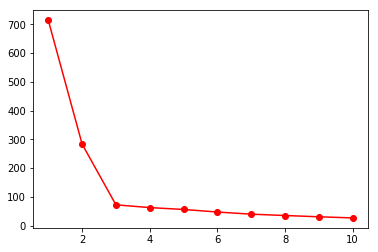

In [0]:
# 군집의 수를 3으로 설정하고 평가하기
kms3 = KMeans(n_clusters=3, max_iter=300, 
             random_state=0, n_init=10, n_jobs=-1)

kms3.fit(X)

kms3.labels_
kms3.cluster_centers_
kms3.inertia_   # SSE : 클러스터내 오차 제곱합

silhouette_score(X, kms3.labels_)



# 엘보우 방법을 이용해서 최적의 클러스터 수 찾기
# inertia : 군집화가 된 후 각 중심점에서 군집 데이터간의 거리를 합산한 값
#           군집이 어느 정도로 잘 되있는지를 나타내는 값
#           => 이값이 작을수록 군집의 을집이 높다는 의미

inertias = []
for k in range(1, 11):
    kms = KMeans(n_clusters=k, max_iter=300, 
             random_state=0, n_init=10, n_jobs=-1)
    kms.fit(X)
    inertias.append(kms.inertia_)
    
plt.plot(range(1, 11), inertias, 'ro-')
plt.show()
    
# 그래프를 보면 k가 3을 기점으로 SSE 값의 변화폭이 작음
# => 엘보우 포인트는 3이 무난


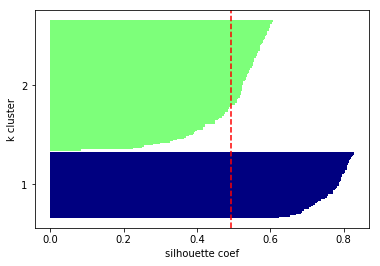

In [0]:
# 실루엣 그래프로 군집결과 품질 평가
# SSW 와 SSB를 구해서 이 둘의 차이를 그 중 큰 값으로 나눈 값

# SSW : sum of squares within cluster
#       클러스터 응집도
#       동일 클러스터 내 모든 다른 데이터 사이의 
#       거리 평균을 계산한 값

# SSB : sum of squares between cluster
#       클러스터 분리도
#       관측값과 가까운 클러스터 내 데이터 사이의 
#       거리 평균을 계산한 값


# k=2일 때, 실루엣 그래프
cluster_labels = np.unique(kms2.labels_)
# 군집화된 군집 번호


n_clusters = cluster_labels.shape[0]
# 군집의 갯수


silhouette_vals = silhouette_samples(
    X, kms2.labels_, metric='euclidean')
# 각 표본에 대한 실루엣 계수 계산


y_ax_low, y_ax_high = 0, 0

yticks = []
# 개별 군집에 대한 실루엣그래프를 그려야 하므로
# 표본수와 군집수를 이용해서 y축 범위 지정
# y 축 값 저장을 위한 변수 선언 및 초기화


for i, c in enumerate(cluster_labels):
    # 군집별로 실루엣 그래프를 그리기 위해 
    # enumerate 함수를 for 문으로 반복 실행
    
    c_s_vals = silhouette_vals[kms2.labels_ == c]
    c_s_vals.sort()
    # 군집별 실루엣 계수 계산 정렬

    y_ax_high += len(c_s_vals)
    # 집계된 실루엣 계수 크기 확인 후
    # y축 범위 재조정
    
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_low, y_ax_high), 
             c_s_vals, height=1.0, color=color)
    # 계산된 실루엣 계수에 따라 적절한 색상으로 그래프를 그림
        
    yticks.append((y_ax_low + y_ax_high) / 2.0)
    y_ax_low += len(c_s_vals)
    # 다음에 표시할 실루엣계수 그래프를 위해 
    # 적절한 위치에 y축 눈금 추가
    
c_s_mean = np.mean(c_s_vals)    
plt.axvline(c_s_mean, color='red', linestyle='--')
# 모든 실루엣 계수의 평균을 계산해서 수직선으로 표시

plt.yticks(yticks, cluster_labels + 1)

plt.xlabel('silhouette coef')
plt.ylabel('k cluster')

plt.show()


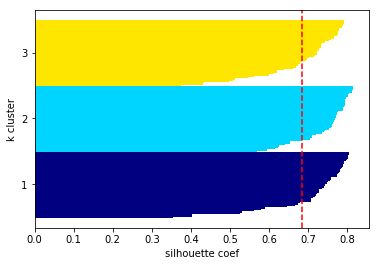

In [0]:
# k=3일 때, 실루엣 그래프
cluster_labels = np.unique(kms3.labels_)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(
    X, kms3.labels_, metric='euclidean')

y_ax_low, y_ax_high = 0, 0

yticks = []

for i, c in enumerate(cluster_labels):
    c_s_vals = silhouette_vals[kms3.labels_ == c]
    c_s_vals.sort()
    y_ax_high += len(c_s_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_low, y_ax_high), 
             c_s_vals, height=1.0, color=color)
    yticks.append((y_ax_low + y_ax_high) / 2.)
    y_ax_low += len(c_s_vals)
    
c_s_mean = np.mean(c_s_vals)    
plt.axvline(c_s_mean, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)

plt.xlabel('silhouette coef')
plt.ylabel('k cluster')

plt.show()


# 실루엣 그래프상 각 군집 두께는 실제 군집 크기를 의미
# 실루엣 그래프상 각 군집 굴곡면의 경사도는 
# 실제 군집 크기의 응집도를 의미
# 완만 - 넓게 퍼짐, 경사 : 가깝게 모임 